## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image, display
import ydata_profiling as yp
pd.set_option('display.max_columns', None)

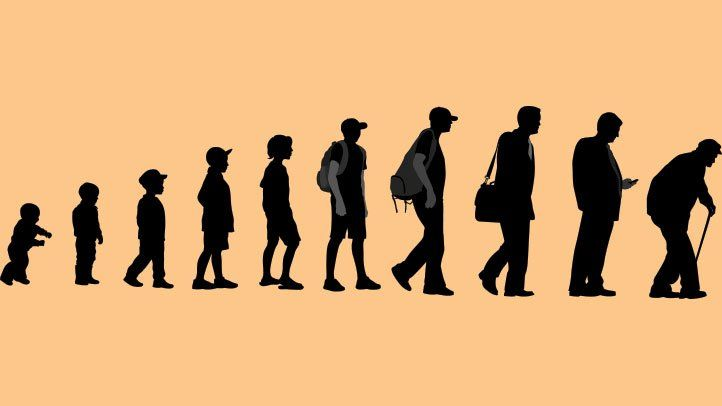

In [2]:
display(Image(filename='photo.jpg', width=1300, height=600))

## Setting a Theme

In [3]:
# sns.set_style('darkgrid')
# sns.set_palette('crest_r')
# my_color = '#1e90c9'


plt.style.use('ggplot')
palette = ["lightpink", "lightskyblue", "lightgreen", "lightsalmon", "Purple"]
sns.set_theme(context= "notebook",palette=palette)

## Remove Warnings

In [4]:
warnings.simplefilter("ignore")

## Read data

In [5]:
data = pd.read_csv('data.csv')

## Data Exploration

In [6]:
data.sample(5)

,Unnamed: 0,Nation,Survey_Year,Country_Category,Mortality_Adults,Infant_Deaths_Count,Alcohol_Consumption_Rate,Expenditure_Percentage_GDP,Hepatitis_B_Vaccination_Coverage,Measles_Infection_Count,Body_Mass_Index_Avg,Polio_Vaccination_Coverage,Total_Health_Expenditure,Diphtheria_Vaccination_Coverage,HIV_AIDS_Prevalence_Rate,Gross_Domestic_Product,Total_Population,Thinness,Life_Expectancy_Years
1577,1577,Egypt,2001.0,Developing,177.0,63,0.14,0.000000,99.0,2150.0,51.2,99.0,5.75,99.0,0.1,NaN,NaN,3.5,68.6
2201,2201,Argentina,2003.0,Developing,137.0,11,7.62,57.584674,73.0,0.0,55.7,95.0,8.22,96.0,0.1,333.437600,3839379.0,1.2,74.1
2073,2073,Mali,2014.0,Developing,272.0,52,0.01,46.562317,73.0,290.0,23.2,74.0,6.86,73.0,1.6,825.572991,16962846.0,7.9,57.8
533,533,France,2003.0,Developing,99.0,3,13.49,4572.441963,28.0,0.0,56.4,96.0,1.43,97.0,0.1,29691.181580,62244884.0,0.6,79.3
2060,2060,Brunei Darussalam,2008.0,Developing,84.0,0,0.67,2538.941033,96.0,3.0,34.2,97.0,2.23,98.0,0.1,37951.286000,NaN,6.1,77.2


## 🔎 Overlook of the Data 
1. **`Unnamed: 0`**  
   - A unique identifier or index for the rows in the dataset (automatically generated).

2. **`Nation`**  
   - The name of the country corresponding to the data entry.

3. **`Survey_Year`**  
   - The year when the data or survey was collected.

4. **`Country_Category`**  
   - Classification of the country (e.g., 'Developing', 'Developed') based on economic or regional status.

5. **`Mortality_Adults`**  
   - The adult mortality rate aged 15-60.

6. **`Infant_Deaths_Count`**  
   - The total number of infant deaths (children under 1 year old) per year.

7. **`Alcohol_Consumption_Rate`**  
   - The per capita alcohol consumption rate in liters per year.

8. **`Expenditure_Percentage_GDP`**  
   - The percentage of the Gross Domestic Product (GDP) spent on healthcare.

9. **`Hepatitis_B_Vaccination_Coverage`**  
   - The percentage of the population vaccinated against Hepatitis B.

10. **`Measles_Infection_Count`**  
    - The total number of reported measles cases.

11. **`Body_Mass_Index_Avg`**  
    - The average Body Mass Index (BMI) of the population.

12. **`Polio_Vaccination_Coverage`**  
    - The percentage of the population vaccinated against Polio.

13. **`Total_Health_Expenditure`**  
    - The total health expenditure per capita (in USD).

14. **`Diphtheria_Vaccination_Coverage`**  
    - The percentage of the population vaccinated against Diphtheria.

15. **`HIV_AIDS_Prevalence_Rate`**  
    - The prevalence rate of HIV/AIDS in the population as a percentage.

16. **`Gross_Domestic_Product`**  
    - The Gross Domestic Product (GDP) per capita (in USD).

17. **`Total_Population`**  
    - The total population of the country.

18. **`Thinness`**  
    - The percentage of the population classified as thin (low BMI).

19. **`Life_Expectancy_Years`**  
    - The average number of years a person is expected to live.

In [7]:
data.columns=data.columns.str.strip().str.lower()

In [8]:
df = data.copy()

In [9]:
df.size

55822

In [10]:
df.shape

(2938, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   unnamed: 0                        2938 non-null   int64  
 1   nation                            2937 non-null   object 
 2   survey_year                       2936 non-null   float64
 3   country_category                  2935 non-null   object 
 4   mortality_adults                  2925 non-null   float64
 5   infant_deaths_count               2938 non-null   int64  
 6   alcohol_consumption_rate          2744 non-null   float64
 7   expenditure_percentage_gdp        2938 non-null   float64
 8   hepatitis_b_vaccination_coverage  2385 non-null   float64
 9   measles_infection_count           2936 non-null   float64
 10  body_mass_index_avg               2904 non-null   float64
 11  polio_vaccination_coverage        2919 non-null   float64
 12  total_

In [12]:
df.isna().sum() / len(df) * 100.0

unnamed: 0                           0.000000
nation                               0.034037
survey_year                          0.068074
country_category                     0.102110
mortality_adults                     0.442478
infant_deaths_count                  0.000000
alcohol_consumption_rate             6.603131
expenditure_percentage_gdp           0.000000
hepatitis_b_vaccination_coverage    18.822328
measles_infection_count              0.068074
body_mass_index_avg                  1.157250
polio_vaccination_coverage           0.646698
total_health_expenditure             7.726344
diphtheria_vaccination_coverage      0.646698
hiv_aids_prevalence_rate             0.000000
gross_domestic_product              15.248468
total_population                    22.191967
thinness                             1.157250
life_expectancy_years                0.340368
dtype: float64

In [13]:
df.columns

Index(['unnamed: 0', 'nation', 'survey_year', 'country_category',
       'mortality_adults', 'infant_deaths_count', 'alcohol_consumption_rate',
       'expenditure_percentage_gdp', 'hepatitis_b_vaccination_coverage',
       'measles_infection_count', 'body_mass_index_avg',
       'polio_vaccination_coverage', 'total_health_expenditure',
       'diphtheria_vaccination_coverage', 'hiv_aids_prevalence_rate',
       'gross_domestic_product', 'total_population', 'thinness',
       'life_expectancy_years'],
      dtype='object')

In [14]:
df.describe()

,unnamed: 0,survey_year,mortality_adults,infant_deaths_count,alcohol_consumption_rate,expenditure_percentage_gdp,hepatitis_b_vaccination_coverage,measles_infection_count,body_mass_index_avg,polio_vaccination_coverage,total_health_expenditure,diphtheria_vaccination_coverage,hiv_aids_prevalence_rate,gross_domestic_product,total_population,thinness,life_expectancy_years
count,2938.000000,2936.00000,2925.000000,2938.000000,2744.000000,2938.000000,2385.000000,2936.000000,2904.000000,2919.000000,2711.000000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2928.000000
mean,1468.500000,2007.52282,164.865299,30.303948,4.602861,738.251295,80.940461,2420.752384,38.321247,82.550188,5.938359,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,69.224932
std,848.271871,4.61257,124.316868,117.926501,4.052413,1987.914858,25.070016,11471.077443,20.044034,23.428046,2.498765,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,9.523867
min,0.000000,2000.00000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,36.300000
25%,734.250000,2004.00000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,78.000000,4.260000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,63.100000
50%,1468.500000,2008.00000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,93.000000,5.760000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,72.100000
75%,2202.750000,2012.00000,228.000000,22.000000,7.702500,441.534144,97.000000,358.750000,56.200000,97.000000,7.495000,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,75.700000
max,2937.000000,2015.00000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,89.000000


In [15]:
df.describe(include='object')

,nation,country_category
count,2937,2935
unique,193,2
top,Syrian Arab Republic,Developing
freq,16,2423


In [16]:
df.duplicated().sum()

0

### let's look deeper, check patterns and overlook the data using `ydata_profiling` 

In [17]:
profile = yp.ProfileReport(df, title = 'My Data')
profile.to_widgets() 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# 🧹✨ Cleaning Trip 🚀

#### 1- We will drop `unnamed: 0` Column because we can't use it in a benefit way
#### 2- Some collumns we 'll edit its `dtype`
#### 3- Some Columns have number of missings not large we will handle it using `interpolation`
#### 4- will check and handle `outliers` 
#### 5- divide the data to `numeric` and `categorical` data

In [18]:
df.drop(columns=['unnamed: 0'], inplace=True)

In [19]:
df.isna().sum() / len(df) * 100.0

nation                               0.034037
survey_year                          0.068074
country_category                     0.102110
mortality_adults                     0.442478
infant_deaths_count                  0.000000
alcohol_consumption_rate             6.603131
expenditure_percentage_gdp           0.000000
hepatitis_b_vaccination_coverage    18.822328
measles_infection_count              0.068074
body_mass_index_avg                  1.157250
polio_vaccination_coverage           0.646698
total_health_expenditure             7.726344
diphtheria_vaccination_coverage      0.646698
hiv_aids_prevalence_rate             0.000000
gross_domestic_product              15.248468
total_population                    22.191967
thinness                             1.157250
life_expectancy_years                0.340368
dtype: float64

### lets see the correclations between features so we can clean it and find the important ones

In [20]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
numeric_df = df[numeric_columns]

In [21]:
c = numeric_df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(c, cmap='RdYlGn_r', annot=True, fmt=".2f")
plt.show()

## as we can see there are strong relationships between:
* `gross_domestic_product` and `expenditure_percentage_gdp` 
* `polio_vaccination_coverage` and `diphtheria_vaccination_coverage` 
## strong inverse correlation between :
* `mortality_adults` and `life_expectancy_years`

In [22]:
percentage_cols = ['alcohol_consumption_rate', 'expenditure_percentage_gdp', 'hepatitis_b_vaccination_coverage', 'polio_vaccination_coverage', 'total_health_expenditure', 'diphtheria_vaccination_coverage', 'hiv_aids_prevalence_rate', 'thinness']

for col in percentage_cols:
    df.loc[df[col] > 100, col] = np.nan

In [23]:
df.isnull().sum()*100/len(df)


nation                               0.034037
survey_year                          0.068074
country_category                     0.102110
mortality_adults                     0.442478
infant_deaths_count                  0.000000
alcohol_consumption_rate             6.603131
expenditure_percentage_gdp          44.349898
hepatitis_b_vaccination_coverage    18.822328
measles_infection_count              0.068074
body_mass_index_avg                  1.157250
polio_vaccination_coverage           0.646698
total_health_expenditure             7.726344
diphtheria_vaccination_coverage      0.646698
hiv_aids_prevalence_rate             0.000000
gross_domestic_product              15.248468
total_population                    22.191967
thinness                             1.157250
life_expectancy_years                0.340368
dtype: float64

In [24]:
countries = df['nation'].unique()

# list of incomplete columns
fill_list = ['survey_year','country_category','mortality_adults','alcohol_consumption_rate','hepatitis_b_vaccination_coverage','measles_infection_count','body_mass_index_avg','polio_vaccination_coverage','total_health_expenditure','diphtheria_vaccination_coverage','gross_domestic_product','total_population','thinness','life_expectancy_years']

# Treat null values using interpolation.
for country in countries:
    df.loc[df['nation'] == country,fill_list] = df.loc[df['nation'] == country,fill_list].interpolate()

In [25]:
df.isnull().sum()*100/len(df)


nation                               0.034037
survey_year                          0.068074
country_category                     0.102110
mortality_adults                     0.340368
infant_deaths_count                  0.000000
alcohol_consumption_rate             1.021103
expenditure_percentage_gdp          44.349898
hepatitis_b_vaccination_coverage     6.739278
measles_infection_count              0.000000
body_mass_index_avg                  1.157250
polio_vaccination_coverage           0.136147
total_health_expenditure             1.633764
diphtheria_vaccination_coverage      0.136147
hiv_aids_prevalence_rate             0.000000
gross_domestic_product              14.125255
total_population                    22.055820
thinness                             1.157250
life_expectancy_years                0.340368
dtype: float64

### 1- Near to half of `expenditure_percentage_gdp` column is missing lets drop it
### 2- I see we will not take any benifit from `thinness` column so drop it

In [26]:
df.drop(columns=['expenditure_percentage_gdp', 'thinness'], inplace=True)

## Clean `nation` column

In [27]:
df['nation'].value_counts()

nation
Syrian Arab Republic     16
Djibouti                 16
Ethiopia                 16
El Salvador              16
Bulgaria                 16
                         ..
Saint Kitts and Nevis     1
San Marino                1
Niue                      1
Marshall Islands          1
Dominica                  1
Name: count, Length: 193, dtype: int64

In [28]:
df['nation'].isna().sum()

1

In [29]:
df.dropna(subset=['nation'], inplace=True)

## Clean `survey_year` column

In [30]:
df['survey_year'].isna().sum()

2

In [31]:
df['survey_year'].value_counts()

survey_year
2013.0    193
2006.0    183
2007.0    183
2014.0    183
2008.0    183
2011.0    183
2015.0    183
2009.0    183
2004.0    183
2001.0    183
2012.0    183
2002.0    183
2010.0    183
2000.0    182
2005.0    182
2003.0    182
Name: count, dtype: int64

In [32]:
df.dropna(subset=['survey_year'], inplace=True)


In [33]:
df['survey_year'].value_counts().plot(kind='bar')

<Axes: xlabel='survey_year'>

## Clean `country_category` column 

In [34]:
df['country_category'].isna().sum()

3

In [35]:
df['country_category'].value_counts()

country_category
Developing    2420
Developed      512
Name: count, dtype: int64

In [36]:
df['country_category'].fillna('Developing', inplace=True)

In [37]:
plt.pie(df['country_category'].value_counts().values, labels=df['country_category'].value_counts().index, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x27e65cda150>,
 [Text(-0.9389024561980029, 0.5731161991650185, 'Developing'),
  Text(0.9389024561980032, -0.5731161991650183, 'Developed')],
 [Text(-0.5121286124716379, 0.31260883590819194, '82.6%'),
  Text(0.5121286124716381, -0.3126088359081918, '17.4%')])

### Note more than 80% of countries in the survey is `Developing`

## Clean `mortality_adults`

In [38]:
df['mortality_adults'].isna().sum()

10

In [39]:
df['mortality_adults'].value_counts()

mortality_adults
12.0     33
14.0     30
16.0     29
11.0     25
138.0    25
         ..
578.0     1
613.0     1
622.0     1
652.0     1
633.0     1
Name: count, Length: 427, dtype: int64

In [40]:
df[df['mortality_adults'].isna()]

,nation,survey_year,country_category,mortality_adults,infant_deaths_count,alcohol_consumption_rate,hepatitis_b_vaccination_coverage,measles_infection_count,body_mass_index_avg,polio_vaccination_coverage,total_health_expenditure,diphtheria_vaccination_coverage,hiv_aids_prevalence_rate,gross_domestic_product,total_population,life_expectancy_years
243,San Marino,2013.0,Developing,NaN,0,0.01,69.0,0.0,NaN,69.0,6.50,69.0,0.1,NaN,NaN,NaN
357,Tuvalu,2013.0,Developing,NaN,0,0.01,9.0,0.0,79.3,9.0,16.61,9.0,0.1,3542.135890,1819.0,NaN
723,Marshall Islands,2013.0,Developing,NaN,0,0.01,8.0,0.0,81.6,79.0,17.24,79.0,0.1,3617.752354,NaN,NaN
874,Niue,2013.0,Developing,NaN,0,0.01,99.0,0.0,77.3,99.0,7.20,99.0,0.1,NaN,NaN,NaN
1317,Saint Kitts and Nevis,2013.0,Developing,NaN,0,8.54,97.0,0.0,5.2,96.0,6.14,96.0,0.1,NaN,NaN,NaN
1537,Nauru,2013.0,Developing,NaN,0,0.01,87.0,0.0,87.3,87.0,4.65,87.0,0.1,136.183210,NaN,NaN
2178,Cook Islands,2013.0,Developing,NaN,0,0.01,98.0,0.0,82.8,98.0,3.58,98.0,0.1,NaN,NaN,NaN
2357,Palau,2013.0,Developing,NaN,0,NaN,99.0,0.0,83.3,99.0,9.27,99.0,0.1,1932.122370,292.0,NaN
2551,Monaco,2013.0,Developing,NaN,0,0.01,99.0,0.0,NaN,99.0,4.30,99.0,0.1,NaN,NaN,NaN
2923,Dominica,2013.0,Developing,NaN,0,0.01,96.0,0.0,58.4,96.0,5.58,96.0,0.1,722.756650,NaN,NaN


In [41]:
countries_with_missed_mortality_adults = df.loc[df['mortality_adults'].isna(), 'nation'].unique()

for country in countries_with_missed_mortality_adults:

    mean_value = df[ df['survey_year'] == 2013.0]['mortality_adults'].mean()
    df.loc[df['mortality_adults'].isna() , 'mortality_adults'] = mean_value


## Clean `alcohol_consumption_rate` column

In [42]:
df['alcohol_consumption_rate'].value_counts()

alcohol_consumption_rate
0.01     298
0.03      15
0.04      13
0.09      12
0.02      12
        ... 
10.56      1
10.50      1
7.41       1
5.51       1
1.07       1
Name: count, Length: 1173, dtype: int64

In [43]:
df['alcohol_consumption_rate'].isna().sum()

30

In [44]:
df['alcohol_consumption_rate'].fillna(df['alcohol_consumption_rate'].mode()[0], inplace=True)

In [45]:
# Plot the histogram for the 'alcohol_consumption_rate' column
plt.figure(figsize=(10, 6)) 
plt.hist(df['alcohol_consumption_rate'], bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Alcohol Consumption Rate Distribution')
plt.xlabel('Alcohol Consumption Rate')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Clean `Hepatitis_B_Vaccination_Coverage` column

In [46]:
df['hepatitis_b_vaccination_coverage'].isna().sum()

196

In [47]:
df['hepatitis_b_vaccination_coverage'].value_counts()

hepatitis_b_vaccination_coverage
99.000000    246
98.000000    213
96.000000    168
97.000000    158
95.000000    157
            ... 
78.500000      1
7.600000       1
75.333333      1
88.666667      1
19.000000      1
Name: count, Length: 211, dtype: int64

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df['hepatitis_b_vaccination_coverage'])

(array([ 186.,   25.,   29.,   41.,   85.,   78.,  173.,  251.,  475.,
        1396.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

In [49]:
df['hepatitis_b_vaccination_coverage'].interpolate(method='linear', inplace=True)


In [50]:
df['hepatitis_b_vaccination_coverage'].isna().sum()

0

## Clean `body_mass_index_avg` column

In [51]:
df['body_mass_index_avg'].isna().sum()

34

In [52]:
df['body_mass_index_avg'].value_counts()

body_mass_index_avg
58.5    18
55.8    16
57.0    16
54.2    15
59.9    15
        ..
38.0     1
12.0     1
7.1      1
43.7     1
28.3     1
Name: count, Length: 608, dtype: int64

In [53]:
Q1 = df['body_mass_index_avg'].quantile(0.25)
Q3 = df['body_mass_index_avg'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['body_mass_index_avg'] < lower_bound) | (df['body_mass_index_avg'] > upper_bound)]

# Display outliers
outliers

,nation,survey_year,country_category,mortality_adults,infant_deaths_count,alcohol_consumption_rate,hepatitis_b_vaccination_coverage,measles_infection_count,body_mass_index_avg,polio_vaccination_coverage,total_health_expenditure,diphtheria_vaccination_coverage,hiv_aids_prevalence_rate,gross_domestic_product,total_population,life_expectancy_years


#### no outliers

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df['body_mass_index_avg'], bins=40)

(array([ 78.,  75., 123.,   6.,   5.,  75., 120., 159., 127., 101., 112.,
         83.,  82.,  35.,  60.,  37.,  41.,  52.,  28.,  75.,  96., 113.,
         79., 111., 178., 210., 215., 108., 121.,  89.,  45.,  27.,   7.,
         12.,   7.,   4.,   1.,   2.,   1.,   1.]),
 array([ 1.    ,  3.1575,  5.315 ,  7.4725,  9.63  , 11.7875, 13.945 ,
        16.1025, 18.26  , 20.4175, 22.575 , 24.7325, 26.89  , 29.0475,
        31.205 , 33.3625, 35.52  , 37.6775, 39.835 , 41.9925, 44.15  ,
        46.3075, 48.465 , 50.6225, 52.78  , 54.9375, 57.095 , 59.2525,
        61.41  , 63.5675, 65.725 , 67.8825, 70.04  , 72.1975, 74.355 ,
        76.5125, 78.67  , 80.8275, 82.985 , 85.1425, 87.3   ]),
 <BarContainer object of 40 artists>)

In [55]:
df['body_mass_index_avg'].fillna(df['body_mass_index_avg'].mean(), inplace=True)

## Clean `polio_vaccination_coverage` column

In [56]:
df['polio_vaccination_coverage'].value_counts()

polio_vaccination_coverage
99.000000    376
98.000000    255
96.000000    207
97.000000    205
95.000000    179
            ... 
17.000000      1
94.333333      1
90.000000      1
79.500000      1
33.000000      1
Name: count, Length: 81, dtype: int64

In [57]:
df['polio_vaccination_coverage'].isna().sum()

4

In [58]:
df['polio_vaccination_coverage'].fillna(df['polio_vaccination_coverage'].mode()[0], inplace=True)

## Clean `total_health_expenditure` column

In [59]:
df['total_health_expenditure'].value_counts()

total_health_expenditure
4.600    16
6.700    12
5.600    11
5.640    11
8.900    10
         ..
2.940     1
9.730     1
2.695     1
5.280     1
2.970     1
Name: count, Length: 931, dtype: int64

In [60]:
df['total_health_expenditure'].isna().sum()

48

In [61]:
df['total_health_expenditure'].interpolate(method='linear', inplace=True)


In [62]:
plt.figure(figsize=(10, 6))
plt.hist(df['total_health_expenditure'], bins=30, color='skyblue', edgecolor='black')



# Display the plot
plt.show()

### it can be considered as ***normally distributed***

## clean `diphtheria_vaccination_coverage` column

In [63]:
df['diphtheria_vaccination_coverage'].value_counts()

diphtheria_vaccination_coverage
99.000000    350
98.000000    254
97.000000    205
96.000000    201
95.000000    199
            ... 
50.333333      1
55.666667      1
19.000000      1
16.000000      1
2.000000       1
Name: count, Length: 90, dtype: int64

In [64]:
df['diphtheria_vaccination_coverage'].isna().sum()

4

In [65]:
df['diphtheria_vaccination_coverage'].fillna(df['diphtheria_vaccination_coverage'].mode()[0], inplace=True)

## clean `gross_domestic_product` column

In [66]:
df['gross_domestic_product'].value_counts()

gross_domestic_product
47.543235       5
1151.861715     4
148.852738      4
1167.535689     1
1682.957924     1
               ..
121.158120      1
1451.297760     1
1276.265000     1
21673.781700    1
276.758960      1
Name: count, Length: 2511, dtype: int64

In [67]:
df['gross_domestic_product'].isna().sum()

414

In [68]:
plt.figure(figsize=(10, 6))
plt.hist(df['gross_domestic_product'], bins=30, color='skyblue', edgecolor='black')


# Display the plot
plt.show()

In [69]:
df['gross_domestic_product'].interpolate(method='linear', inplace=True)

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(df['gross_domestic_product'], bins=30, color='skyblue', edgecolor='black')


# Display the plot
plt.show()

#### the distribution doesn't affected alot .

## clean `total_population` column

In [71]:
df['total_population'].value_counts()

total_population
444.0        4
26868.0      2
1141.0       2
127445.0     2
292.0        2
            ..
5379328.0    1
1134497.0    1
515148.0     1
95114.0      1
39697.0      1
Name: count, Length: 2279, dtype: int64

In [72]:
sns.boxplot(x=df['total_population'])

# Display the plot
plt.show()

In [73]:
Q1 = df['total_population'].quantile(0.25)
Q3 = df['total_population'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# handle outliers
df.loc[((df['total_population'] < lower_bound) | (df['total_population'] > upper_bound) ), 'total_population'] = np.nan



In [74]:
sns.boxplot(x=df['total_population'])

# Display the plot
plt.show()

In [75]:
# First, forward and backward fill any missing values that can't be interpolated
df['total_population'].fillna(method='ffill', inplace=True)
df['total_population'].fillna(method='bfill', inplace=True)

# Then apply linear interpolation to the rest of the missing values
df['total_population'].interpolate(method='linear', inplace=True)

# Check if any missing values remain
print(df['total_population'].isna().sum())


0


## clean `life_expectancy_years` column

In [76]:
df['life_expectancy_years'].value_counts()

life_expectancy_years
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
48.8     1
45.4     1
46.5     1
55.2     1
49.7     1
Name: count, Length: 362, dtype: int64

In [77]:
df['life_expectancy_years'].isna().sum()

10

In [78]:
df['life_expectancy_years'].fillna(df['life_expectancy_years'].median(), inplace=True)

## Check !!!!

In [79]:
df.isna().sum() / len(df) * 100.0

nation                              0.0
survey_year                         0.0
country_category                    0.0
mortality_adults                    0.0
infant_deaths_count                 0.0
alcohol_consumption_rate            0.0
hepatitis_b_vaccination_coverage    0.0
measles_infection_count             0.0
body_mass_index_avg                 0.0
polio_vaccination_coverage          0.0
total_health_expenditure            0.0
diphtheria_vaccination_coverage     0.0
hiv_aids_prevalence_rate            0.0
gross_domestic_product              0.0
total_population                    0.0
life_expectancy_years               0.0
dtype: float64

# 🚀 Visualization Trip 📊✨

In [80]:
df.hist(bins=30, figsize=(18, 12))
plt.show()

In [81]:
cols_numeric = df.select_dtypes("number").columns

fig,axes=plt.subplots(nrows=len(df[cols_numeric].columns)//2 ,ncols=2,figsize=(24,22))
for i,col in enumerate(df[cols_numeric].drop(columns='survey_year').columns):
    row_idx=i//2
    col_idx=i%2
    sns.lineplot(x='survey_year',y=df[col],data=df,ax=axes[row_idx,col_idx],markers=True,ci=None,  marker='o', linestyle='-')
fig.delaxes(axes[6,1])
plt.tight_layout()
plt.show() 

In [82]:
# see top 20 country 

# first set figure size
plt.figure(figsize = (15,6))


graph = sns.countplot(y = 'nation', data = df, order = df['nation'].value_counts().iloc[:20].index, palette='rocket')
for container in graph.containers:
    graph.bar_label(container)

plt.show()


### Bivariate analysis

In [83]:
# see the impact of "status" on "Life Expectancy"

plt.figure(figsize=(10,5))

sns.boxplot(x = 'country_category', y = 'life_expectancy_years', data = df)
plt.xlabel('country_category')
plt.ylabel("life_expectancy_years")
plt.show()

In [84]:
# see the impact of "nation" on "Life Expectancy"

def country_Life_expectancy(reversed, top = None):
    return df.groupby("nation")["life_expectancy_years"].median().sort_values(ascending = reversed).reset_index().head(top)

In [85]:
# see top 10 country of Life Expectancy

country = country_Life_expectancy(reversed = False, top = 10)

# Create the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x = 'nation', y = 'life_expectancy_years', data = country, palette='rocket')

plt.xticks(rotation = 30)

# Show the plot
plt.show()

In [86]:
# see Lows 10 country of Life Expectancy

country = country_Life_expectancy(reversed = True, top = 10)

# Create the bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x = 'nation', y = 'life_expectancy_years', data = country, palette='rocket')

plt.xticks(rotation = 30)

# Show the plot
plt.show()

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(16, 18))

sns.scatterplot(data=df, y='life_expectancy_years', x='gross_domestic_product', ax=axes[0, 0])

sns.scatterplot(data=df, y='life_expectancy_years', x='body_mass_index_avg', ax=axes[0, 1])

sns.scatterplot(data=df, y='life_expectancy_years', x='mortality_adults', ax=axes[1, 0])

sns.scatterplot(data=df, y='life_expectancy_years', x='hiv_aids_prevalence_rate', ax=axes[1, 1])

plt .show()

In [88]:
# Line plot with regression line
sns.regplot(data=df, x='total_health_expenditure', y='life_expectancy_years', scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Title and labels
plt.title('Life Expectancy vs Total Health Expenditure')
plt.xlabel('Total Health Expenditure')
plt.ylabel('Life Expectancy (Years)')

# Show plot
plt.show()

In [89]:
cols_numeric = ['survey_year', 'mortality_adults', 'infant_deaths_count',
        'alcohol_consumption_rate', 'hepatitis_b_vaccination_coverage',
        'measles_infection_count', 'body_mass_index_avg',
        'polio_vaccination_coverage']

fig = plt.figure(figsize=(30,30))

for i in range(len(cols_numeric)):
    plt.subplot(4,2,i+1)
    graph = sns.kdeplot(x=cols_numeric[i], data=df, fill=True, hue='country_category')

In [90]:
mean_mortality = df.groupby('survey_year')['mortality_adults'].mean().reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_mortality['survey_year'], mean_mortality['mortality_adults'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Mortality Adults')
plt.title('Mean Mortality Adults over the Years')

# Show the plot
plt.show()

* 1- the adult mortality in `2004` is soo high 
* 2- it decreased alot between `2011` to `2015`

# Health Data Report: Analysis on Key Health Indicators 📊

## Data Overview 📝

This report provides an analysis of the health data focusing on the relationships between key indicators such as life expectancy, mortality rates, vaccination coverage, health expenditure, and economic data. The following features were selected for analysis:

- **Nation** 🌍
- **Survey Year** 📅
- **Country Category** 🇺🇳
- **Adult Mortality Rate** ⚰️
- **Infant Deaths Count** 👶
- **Alcohol Consumption Rate** 🍷
- **Hepatitis B Vaccination Coverage** 💉
- **Measles Infection Count** 🤧
- **Body Mass Index (BMI) Average** 🏋️‍♂️
- **Polio Vaccination Coverage** 💉
- **Total Health Expenditure** 💰
- **Diphtheria Vaccination Coverage** 💉
- **HIV/AIDS Prevalence Rate** 🏥
- **Gross Domestic Product (GDP)** 💸
- **Total Population** 👥
- **Life Expectancy (Years)** ⏳

---

## Key Insights from the Data 🔑

### 1. **Relationship between Health Indicators and Life Expectancy 🌱**

- **Positive Relationships** ➕:
  - **As the Gross Domestic Product (GDP)** 💸 and **Total Health Expenditure** 💰 increase, **life expectancy** ⏳ tends to increase. This suggests that greater economic resources and higher investments in healthcare are associated with better overall health outcomes.
  - **As Body Mass Index (BMI)** 🏋️‍♂️ and **Schooling** 📚 increase, **life expectancy** ⏳ also shows an upward trend, indicating the role of improved nutrition and education in overall health.

- **Negative Relationships** ➖:
  - **Adult Mortality** ⚰️ and **HIV/AIDS Prevalence Rate** 🏥 show a negative relationship with **life expectancy** ⏳. As these factors increase, life expectancy tends to decrease, highlighting the significant impact of adult health and disease burden on the population's longevity.

### 2. **Health and Vaccination Indicators 💉**

- **Infant Deaths and Under-Five Deaths** 👶:  
  A strong relationship is observed between **infant deaths** 👶 and **under-five deaths** 🧒, suggesting that improvements in infant health are crucial for reducing early childhood mortality.
  
- **Vaccination Coverage** 💉:  
  Increased coverage in **Polio**, **Diphtheria**, and **Hepatitis B** vaccinations 💉 corresponds with improvements in health outcomes. These vaccinations are directly linked to reductions in infectious diseases, which in turn support higher life expectancy ⏳.

### 3. **Socioeconomic Factors and Their Impact 🌍**

- **Country Categories** 🌍:  
  Developing countries generally have larger populations 👥 compared to developed countries. However, life expectancy tends to be lower in developing countries. In these countries, life expectancy ⏳ ranges between 70-80 years, whereas developed countries tend to have higher life expectancy ⏳, ranging between 75-85 years.

- **Income Composition of Resources and Schooling** 💸📚:  
  These factors are strongly correlated with improved health outcomes. As income levels 💸 and educational resources 📚 increase, so does life expectancy ⏳.

### 4. **Trends Over Time ⏳**

- **2015** 🗓️ stands out as a year with notably higher life expectancy ⏳ values compared to other years, reflecting potential improvements in healthcare and global health initiatives during this period.

### 5. **Outliers and Missing Data ❗**
- Several features contained outliers 🚨, which were handled by replacing the outliers with null values. These null values were then processed, ensuring the data is clean and ready for analysis.

---

## Conclusion 💡

The analysis of the selected features reveals clear patterns in how socioeconomic, health, and demographic factors influence life expectancy ⏳. Key takeaways include:

- **Higher economic and health expenditure** 💸💰 contribute positively to **life expectancy** ⏳.
- **Adult mortality rates** ⚰️ and **HIV/AIDS prevalence** 🏥 are significant negative factors.
- **Improved vaccination coverage** 💉 and **better nutrition** 🏋️‍♂️ play a critical role in enhancing population health.
- **Developing countries** 🌍 are generally larger but show lower life expectancy ⏳ than developed countries.
- The **year 2015** 🗓️ saw a notable increase in life expectancy ⏳, possibly due to global healthcare improvements.

By focusing on these key health indicators 💉, this report underscores the importance of continued investment in healthcare, education 📚, and economic development 💸 to improve global health outcomes 🌍.
